In [1]:
import tifffile as tiff
import numpy as np
from PIL import Image
#Image.MAX_IMAGE_PIXELS = 1000000000
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo_utils import gdal_merge
#import cv2

import scipy.misc

from utils import read_mod09ga_tiff_refl_bands
from utils import make_tc_corrected_img_from_bands

gdal.UseExceptions()

In [2]:
modis_tower_path = "/home/mxh/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_volume_path="/media/mxh/Volume/SAT-DATA/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"

modis_win_path = "F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\"
modis_x_path = "/mnt/f/Bachelorarbeit/sat-data/modis/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_wsl_path = "/home/sisa/sat-data/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"# "\\wsl.localhost\fedora39\home\sisa\sat-data"

# experiments
modis_exp2_wsl_path = "/home/sisa/sat-data/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/experiment2/"

modis_path = modis_exp2_wsl_path

In [3]:
days = {
0: "MOD09GA.A2023335.h18v04.061.2023340033530.hdf",
1: "MOD09GA.A2023336.h18v04.061.2023338023416.hdf",
2: "MOD09GA.A2023337.h18v04.061.2023339023523.hdf",
3: "MOD09GA.A2023338.h18v04.061.2023340034455.hdf", 
4: "MOD09GA.A2023339.h18v04.061.2023341041457.hdf",
5: "MOD09GA.A2023340.h18v04.061.2023342030232.hdf",
6: "MOD09GA.A2023341.h18v04.061.2023343024753.hdf",
7: "MOD09GA.A2023342.h18v04.061.2023344024915.hdf",
8: "MOD09GA.A2023343.h18v04.061.2023345024918.hdf",
9: "MOD09GA.A2023344.h18v04.061.2023346030519.hdf",
10: "MOD09GA.A2023345.h18v04.061.2023347025532.hdf",
11: "MOD09GA.A2023346.h18v04.061.2023348030312.hdf",
12: "MOD09GA.A2023347.h18v04.061.2023349025736.hdf",
13: "MOD09GA.A2023348.h18v04.061.2023350024202.hdf",
14: "MOD09GA.A2023349.h18v04.061.2023351023935.hdf",
15: "MOD09GA.A2023350.h18v04.061.2023352030330.hdf",
16: "MOD09GA.A2023351.h18v04.061.2023353030525.hdf",
17: "MOD09GA.A2023352.h18v04.061.2023354042819.hdf",
18: "MOD09GA.A2023353.h18v04.061.2023355063849.hdf",
19: "MOD09GA.A2023354.h18v04.061.2023356042206.hdf",
20: "MOD09GA.A2023355.h18v04.061.2023357031321.hdf",
21: "MOD09GA.A2023356.h18v04.061.2023361000333.hdf",
22: "MOD09GA.A2023357.h18v04.061.2023359024858.hdf",
23: "MOD09GA.A2023358.h18v04.061.2023360025923.hdf",
24: "MOD09GA.A2023359.h18v04.061.2023361050233.hdf",
25: "MOD09GA.A2023360.h18v04.061.2023362134719.hdf",
26: "MOD09GA.A2023361.h18v04.061.2023363043955.hdf",
27: "MOD09GA.A2023362.h18v04.061.2023364042452.hdf",
28: "MOD09GA.A2023363.h18v04.061.2023365041515.hdf",
29: "MOD09GA.A2023364.h18v04.061.2024001025343.hdf",
30: "MOD09GA.A2023365.h18v04.061.2024004181336.hdf"
}

## Output from --img=x.hdf

In [6]:
file = gdal.Open(modis_path + "exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023345.h18v04.061.2023347025532.tif")

In [7]:
data = file.ReadAsArray()

In [8]:
data.shape

(7, 2400, 2400)

In [9]:
data[:,0,0]

array([-9999, -9999, -9999, -9999, -9999, -9999, -9999], dtype=int16)

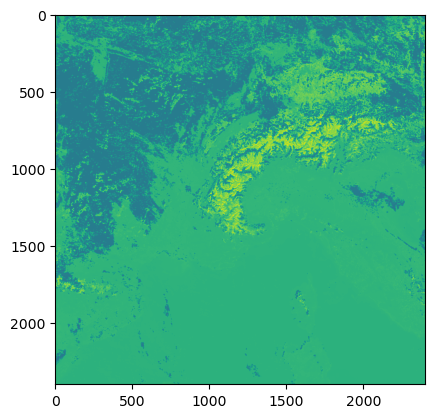

In [10]:
plt.imshow(data[3,:,:])

In [12]:
r_band,g_band,b_band = read_mod09ga_tiff_refl_bands(modis_path, "exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023345.h18v04.061.2023347025532.tif")

In [13]:
r_band

array([[-9999, -9999,   435, ..., -9999, -9999, -9999],
       [-9999, -9999,   398, ..., -9999, -9999, -9999],
       [  399,   417,   420, ...,  2627,  1057,  1054],
       ...,
       [  683,   789,   903, ...,    -6,   -14,   -17],
       [  794,   794,   852, ...,    -6,   -14,    -1],
       [  706,   706,   861, ...,    -8,   -12,    -1]], dtype=int16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


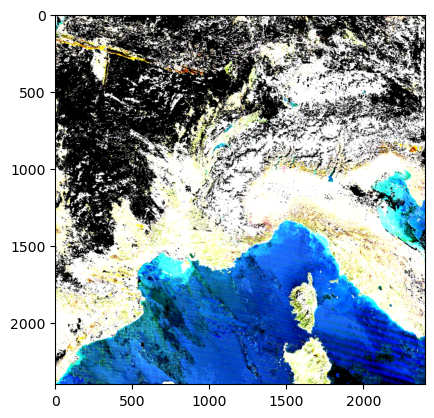

In [14]:
plt.imshow(np.dstack([r_band, g_band, b_band]))

In [25]:
tc, _ = make_tc_corrected_img_from_bands(r_band, g_band, b_band, refl_percent=0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


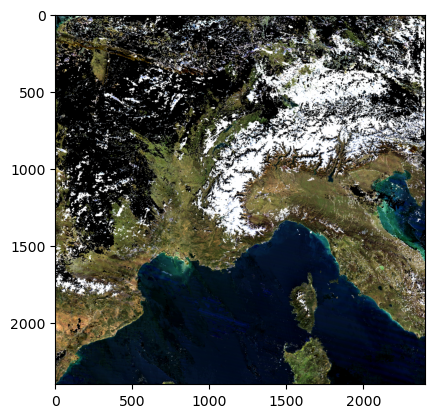

In [26]:
plt.imshow(tc)

### TC for Interpolated

In [ ]:
_ =  "exp_1_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif"
exp_prefix = "exp_1_days-7-20_interpolated_"

In [ ]:
modis_path

'/home/sisa/sat-data/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/experiment2/'

In [ ]:
import os

In [ ]:
files = os.listdir(modis_path)

In [ ]:
interpolated_tif_files = [f for f in files if exp_prefix in f]


In [ ]:
interpolated_tif_files

['exp_1_days-7-20_interpolated_MOD09GA.A2023347.h18v04.061.2023349025736.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023351.h18v04.061.2023353030525.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023343.h18v04.061.2023345024918.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023345.h18v04.061.2023347025532.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023346.h18v04.061.2023348030312.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023344.h18v04.061.2023346030519.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023348.h18v04.061.2023350024202.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023342.h18v04.061.2023344024915.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023349.h18v04.061.2023351023935.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023353.h18v04.061.2023355063849.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023350.h18v04.061.2023352030330.tif',
 'exp_1_days-7-20_interpolated_MOD09GA.A2023352.h18v

In [ ]:
for i, filename in enumerate(interpolated_tif_files):
    day_filename = filename[:-4] # without file extension
    merge_mod09ga_refl_bands_to_true_color(modis_path, day_filename, extension=".tif")

RuntimeError: HDF4_EOS:EOS_GRID:"../MOD09GA.A2023347.h18v04.061.2023349025736.hdf":MODIS_Grid_500m_2D:sur_refl_b03_1: No such file or directory

## Output from --img=x_merged_2400.tiff

In [46]:
filename = "exp_3_mod-tiff_ql-img_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753_merged_2400.tif"

In [47]:
file = gdal.Open(modis_exp2_wsl_path + filename)

In [48]:
data = file.ReadAsArray()

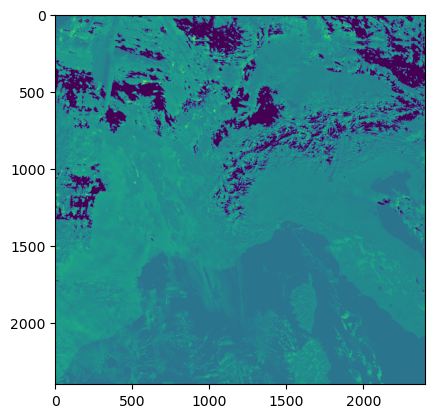

In [52]:
plt.imshow(data[1,:,:])